In [18]:
# 简单读取心电信号

import wfdb
import matplotlib.pyplot as plt

# 读取本地的100号记录，从0到25000个样本点
# physical=False，提取出的信号为d_signal数字信号，也就是没有转换成心电信号电压幅度之前的原始信号的值
# physical=True，读取出每一个点的模拟信号值也就是对应采样点的mv电压值p_signal（两个一模一样的波只不过纵坐标轴的尺度不一样）
# channels，每一次读取的数据都包含两个通道的信号可以设置为channels=[0, ]选择第一个信号,channels=[, 1]选择第二个信号,channels=[0, 1]选择两个信号
record = wfdb.rdrecord('mit-bih-arrhythmia-database-1.0.0/100', sampfrom=0, sampto=25000, physical=True, channels=[0, ])
print (f'心电信号维度：{record.p_signal.shape}')

心电信号维度：(25000, 1)


### R波检测
- 一阶差分：确定信号的边界点值
$$
\Delta y(n) = y(n+1) - y(n)
$$

- 二阶差分：确定信号的波峰值
$$
\begin{align*}
\Delta (\Delta y(n)) &= \Delta (y(n+1) - y(n)) = \Delta y(n+1) - \Delta y(n) \\
&= y(n+2) - y(n+1) - (y(n+1) - y(n)) \\
&= y(n+2) - 2 y(n+1) + y(n)
\end{align*}
$$
- 和设定的阈值做比较，判断R波峰的具体位置

选择信号维度：(612, 1)


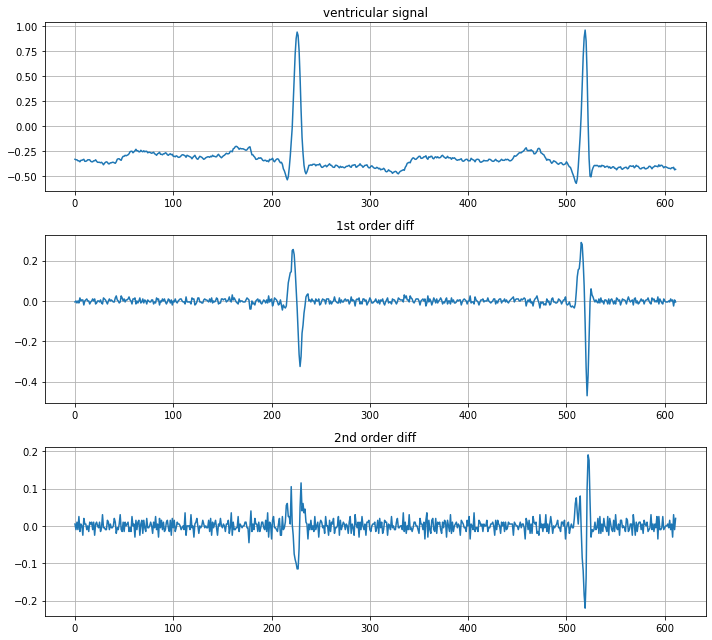

In [19]:
# ventricular signal
plt.figure(figsize=(10,9))
plt.subplot(3,1,1)
ventricular_signal = record.p_signal[144:756]
print (f'选择信号维度：{ventricular_signal.shape}')
plt.title('ventricular signal')
plt.plot(ventricular_signal)
plt.grid()

plt.subplot(3,1,2)
# 一阶差分
diff1 = record.p_signal[144+1:756+1] - record.p_signal[144:756]
plt.title("1st order diff")
plt.plot(diff1)
plt.grid()

plt.subplot(3,1,3)
# 二阶差分
diff2 = record.p_signal[144+2:756+2] - 2 * record.p_signal[144+1:756+1] + record.p_signal[144:756]
plt.title('2nd order diff')
plt.plot(diff2)
plt.grid()

plt.tight_layout()
plt.show()

In [33]:
import numpy as np


FEATURE_DETECT_NEED_BLOCK = 7

def get_win_max(sig, left ,right):
    """ compute the maximum value and correponding index of signal inside the window
    Param:
    sig: given signal
    left: left index of window
    right: right index of window
    Returns:
    max_idx
    max_value
    """
    max_idx = left
    max_value = sig[max_idx]
    for i in range(left, right):
        if sig[i] > max_value:
            max_idx = i
            max_value = sig[i]
    return max_idx, max_value

def get_win_max1(sig, left, right):
    """ same function but using numpy.argmax
    """
    i = np.argmax(sig[left:right])
    return i+left, sig[i+left]

def get_win_min1(sig, left, right):
    i = np.argmin(sig[left:right])
    return i+left, sig[i+left]

def mid_max_judge(peaks_array):
    mid_value = peaks_array[int(FEATURE_DETECT_NEED_BLOCK / 2)]
    for value in peaks_array:
        if value > mid_value:
            return False
    return True

def mid_max_judge1(peaks_array):
    mid_value = peaks_array[int(FEATURE_DETECT_NEED_BLOCK / 2)]
    return np.max(peaks_array) == mid_value

def update_win(peaks_array, g_gs_valid_num, g_gs_mean_rri, first_flag=False):
    return peaks_array

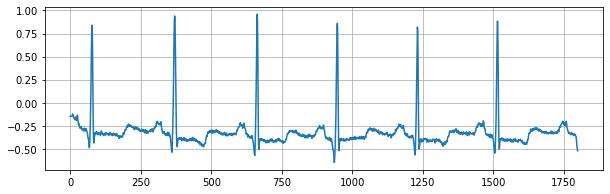

In [47]:
t = 5 # samples in 5 seconds
sig = record.p_signal[:t*360] # idx = 77 is the max value
plt.figure(figsize=(10,3))
plt.plot(sig)
plt.grid()
plt.show()

差分阈值法R波检测
- 选取心电信号起始点，从平稳部分开始，避免从R波附近开始
- 以时间窗宽度$wf$截取一段心电数据$x_{wf}(t)$，求此段数据的最大值点$R_1$，对$w_{wf}(t)$向前做一阶差分，计作$dif(t)$
- 单个R波检测
  - 找出一阶差分序列的最大位置$dif_{max}$和最小位置$dif_{min}$
  - 比较最大位置$dif_{max}$和最小位置$dif_{min}$之间的数据，找出此段数据中的最大值点，即为心电信号$x(t)$的第一个$R^{'}$位置

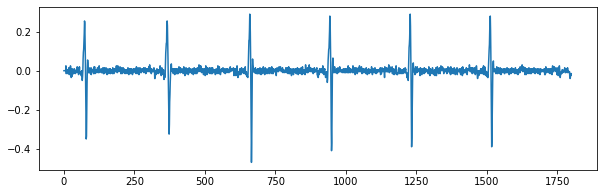

In [54]:
fs = 360 # s

left = 0 * fs
right = 5 * fs
idx_R1, value_R1 = get_win_max(sig=record.p_signal, left=left, right=right)
dif1 = record.p_signal[left+1:right+1] - record.p_signal[left:right]
idx_difmax, value_difmax = get_win_max1(sig=dif1, left=left, right=right)
idx_difmin, value_difmin = get_win_min1(sig=dif1, left=left, right=right)
value_winmax = get_win_max(sig=)
plt.figure(figsize=(10, 3))
plt.plot(dif1)



In [55]:
print (idx_difmax, value_difmax)
print (idx_difmin, value_difmin)

659 [0.29]
665 [-0.47]
